# 1.Objective

In [2]:
#Predict the next days closing price using:
#Open
#High
#Low
#Volume

2. Required Libraries

In [3]:
pip install yfinance pandas numpy matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


3. Load Historical Stock Data (Yahoo Finance)

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [5]:
# Select stock
stock_symbol = "AAPL"

# Download data
data = yf.download(stock_symbol, start="2020-01-01", end="2024-01-01")

# Display first rows
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.468254  72.528574  71.223252  71.476592  135480400
2020-01-03  71.763725  72.523754  71.539337  71.696167  146322800
2020-01-06  72.335564  72.374169  70.634547  70.885479  118387200
2020-01-07  71.995354  72.600960  71.775789  72.345204  108872000
2020-01-08  73.153503  73.455103  71.698589  71.698589  132079200


#4. Data Preprocessing

Predict next day Close price

In [6]:
# Shift Close price by -1 (next day)
data['Next_Close'] = data['Close'].shift(-1)

# Drop last row (NaN value)
data.dropna(inplace=True)


Select Features and Target

In [7]:
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Next_Close']


#5. Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


#6. Train Linear Regression Model

In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

#7. Make Predictions

In [11]:
y_pred = model.predict(X_test)


#8. Model Evaluation

In [12]:
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)


Mean Absolute Error: 1.6557692548019627
Root Mean Squared Error: 2.226029410209908


#9. Plot Actual vs Predicted Closing Prices

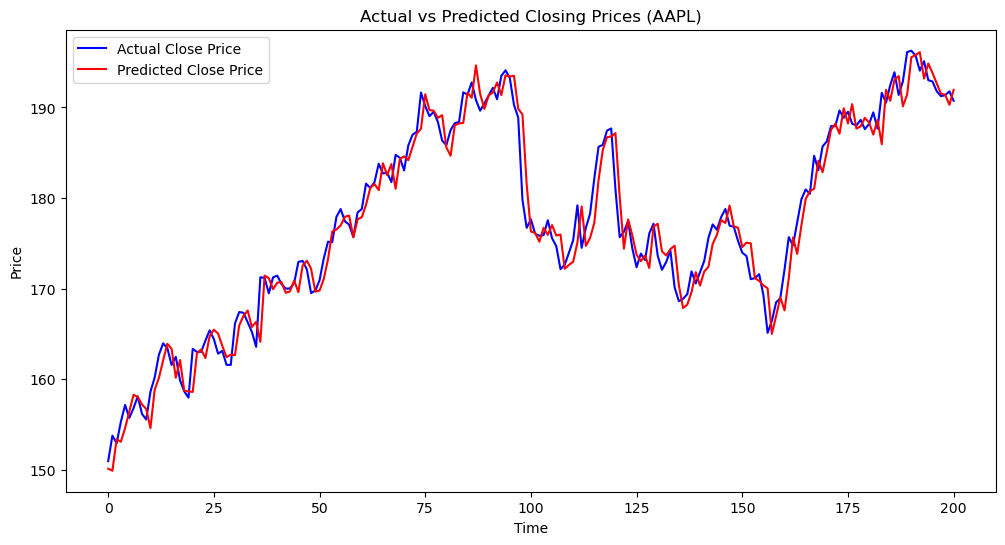

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label="Actual Close Price", color='blue')
plt.plot(y_pred, label="Predicted Close Price", color='red')
plt.title("Actual vs Predicted Closing Prices (AAPL)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()
